In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims = pd.read_csv("claims.csv")
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [3]:
cust_demo = pd.read_csv("cust_demographics.csv")
cust_demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [4]:
insurance_data = pd.merge(left = cust_demo, right = claims, left_on = "CUST_ID", right_on = "customer_id", how = "right")
del insurance_data["customer_id"]
insurance_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [5]:
insurance_data.dtypes

CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [6]:
insurance_data["claim_amount"]=pd.to_numeric(insurance_data.claim_amount.str[1:].replace(',', '', regex=True))
insurance_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No


### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [7]:
injury_claim_data = insurance_data.copy()
injury_claim_data = injury_claim_data.loc[(injury_claim_data["claim_type"].str.contains("injury")) | (injury_claim_data["claim_type"].str.contains("Injury"))]
injury_claim_data["police_report_unreported"] = np.where((injury_claim_data.police_report == "Unknown"),1,0)
injury_claim_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,police_report_unreported
8,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,24050443,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes,0
9,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,91475471,Driver error,02/09/2018,Auto,Unknown,Material and injury,36810.0,1.0,No,1
15,51583214.0,Male,31-Oct-99,NH,743-486-5264,Platinum,28564401,Other driver error,12/10/2017,Auto,Unknown,Material and injury,16690.0,1.0,No,1
18,18288638.0,Female,14-Jan-69,MI,314-135-1359,Platinum,67257404,Other driver error,04/24/2018,Auto,Yes,Injury only,32560.0,1.0,No,0
21,63916778.0,Male,07-Sep-66,IL,146-157-4572,Platinum,7809917,Other causes,07/22/2017,Auto,No,Injury only,17800.0,1.0,No,0
22,17004138.0,Female,13-Aug-65,WA,436-354-4682,Silver,29205389,Natural causes,06/25/2017,Auto,No,Injury only,31380.0,1.0,No,0
23,9667764.0,Female,10-Oct-79,SC,643-978-8251,Platinum,19051665,Other causes,12/17/2017,Auto,Yes,Injury only,36190.0,1.0,No,0
27,35597589.0,Female,17-Feb-80,IN,826-731-3964,Gold,68848682,Other driver error,05/29/2017,Auto,Yes,Injury only,16830.0,1.0,No,0
30,32155446.0,Male,07-May-85,AZ,847-936-7645,Gold,71088680,Driver error,12/24/2017,Auto,No,Material and injury,32640.0,4.0,No,0
33,80379865.0,Male,27-Feb-69,NM,427-513-8479,Gold,18210740,Natural causes,02/09/2018,Auto,No,Injury only,18580.0,NaN,No,0


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. 
#### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column. 

In [8]:
customer_recent_data = insurance_data.copy()
customer_recent_data.shape

(1100, 15)

In [9]:
customer_recent_data = customer_recent_data.drop_duplicates()
customer_recent_data.shape
## So, we don't have any duplicate records

(1100, 15)

In [10]:
customer_recent_data["claim_date"] = pd.to_datetime(customer_recent_data.claim_date, format = "%m/%d/%Y")
customer_recent_data = customer_recent_data.groupby(["CUST_ID"], as_index = False)[["claim_date"]].max().reset_index(drop = True)
customer_recent_data.head()

,CUST_ID,claim_date
0,154557.0,2018-04-10
1,263204.0,2018-04-04
2,287476.0,2017-10-17
3,441097.0,2018-03-21
4,524545.0,2018-07-27


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical

In [11]:
insurance_data.isnull().sum()

CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [12]:
insurance_data["gender"] = insurance_data.gender.fillna(insurance_data.gender.mode()[0])
insurance_data["DateOfBirth"] = insurance_data.DateOfBirth.fillna(dt.datetime.today().strftime("%d-%b-%y"))
insurance_data["State"] = insurance_data.State.fillna(insurance_data.State.mode()[0])
insurance_data["Segment"] = insurance_data.Segment.fillna(insurance_data.Segment.mode()[0])
insurance_data["claim_amount"] = insurance_data.claim_amount.fillna(insurance_data.claim_amount.mean())
insurance_data["total_policy_claims"] = insurance_data.total_policy_claims.fillna(insurance_data.total_policy_claims.mean())
insurance_data.isnull().sum()

CUST_ID                15
gender                  0
DateOfBirth             0
State                   0
Contact                15
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims     0
fraudulent              0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
   ####            Children < 18 
   ####             Youth 18-30 
   ####             Adult 30-60 
   ####             Senior > 60

In [13]:
todayDate = dt.datetime.today()
dateList = []
for date in pd.to_datetime(insurance_data.DateOfBirth, format = "%d-%b-%y"):
    if (date > todayDate):
        date = date - pd.DateOffset(years = 100)
    dateList.append(date.strftime("%Y-%m-%d"))
insurance_data["DateOfBirth"] = dateList
insurance_data["DateOfBirth"] = pd.to_datetime(insurance_data.DateOfBirth, format = "%Y-%m-%d")

insurance_data["age"]=(pd.Timestamp('now') - insurance_data["DateOfBirth"]).astype('<m8[Y]')
data_without_missing_values_DOB = insurance_data.loc[(insurance_data.age != 0)]
data_only_with_missing_values_DOB = insurance_data.loc[(insurance_data.age == 0)]

bins = [0,18,30,60,100]
labels = ["Children", "Youth", "Adult", "Senior"]

data_without_missing_values_DOB["age_group"] = pd.cut(data_without_missing_values_DOB["age"], bins = bins, labels = labels, right = False)
data_only_with_missing_values_DOB["age_group"] =  data_without_missing_values_DOB.age_group.mode()[0]
insurance_data = pd.concat([data_without_missing_values_DOB, data_only_with_missing_values_DOB ])

C:\Users\jiyaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jiyaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
insurance_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,age_group
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,40.0,Adult
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,49.0,Adult
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,35.0,Adult
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,35.0,Adult
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,33.0,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [15]:
average_amount_claim = insurance_data.copy()
average_amount_claim = average_amount_claim.groupby(["Segment"])[["claim_amount"]].mean().add_prefix("Average_")
average_amount_claim

,Average_claim_amount
Segment,
Gold,12746.446802
Platinum,12340.893306
Silver,12206.379320


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [16]:
insurance_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,age_group
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,40.0,Adult
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,49.0,Adult
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,35.0,Adult
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,35.0,Adult
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,33.0,Adult


In [17]:
insurance_data["claim_date"] = pd.to_datetime(insurance_data.claim_date, format = "%m/%d/%Y")
oct_date = pd.to_datetime("10/08/2018", format = "%m/%d/%Y")
total_amount_claim = insurance_data.copy()
total_amount_claim["day_diff_from_oct"] = (oct_date - total_amount_claim.claim_date)/np.timedelta64(1, "D")
total_amount_claim = total_amount_claim.loc[(total_amount_claim.day_diff_from_oct > 19)]
total_amount_claim.claim_amount.sum()

12645713.257004833

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [18]:
adults_state_driver_issue = insurance_data.copy()
adults_state_driver_issue.loc[((adults_state_driver_issue["age_group"] == "Adult") & 
                               ((adults_state_driver_issue["State"] == "TX") | 
                                (adults_state_driver_issue["State"] == "DE") | 
                                (adults_state_driver_issue["State"] == "AK")) &
                               ((adults_state_driver_issue["incident_cause"].str.contains("Driver")) | 
                                (adults_state_driver_issue["incident_cause"].str.contains("driver")))
                              )].CUST_ID.count()

27

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [19]:
claim_amount_gender_segment = insurance_data.copy()
claim_amount_gender_segment = claim_amount_gender_segment.groupby(["gender","Segment"])[["claim_amount"]].sum().add_prefix("total_")
claim_amount_gender_segment

total_claim_amount
gender Segment                     
Female Gold            2.109508e+06
       Platinum        2.369305e+06
       Silver          1.901580e+06
Male   Gold            2.861606e+06
       Platinum        2.098099e+06
       Silver          2.346240e+06

AttributeError: 'float' object has no attribute 'deg2rad'

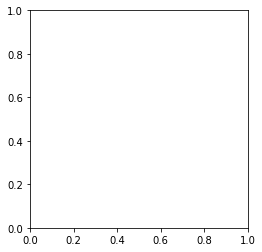

In [20]:
labels=["Female,Gold","Female,Platinum","Female,Silver","Male,Gold","Male,Platinum","Male,Silver"]
plt.pie(claim_amount_gender_segment,labels=labels,autopct="%1.2f%%")
plt.title("Total Claim Amount in Percentage based on Gender & Segment")
plt.show() 

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

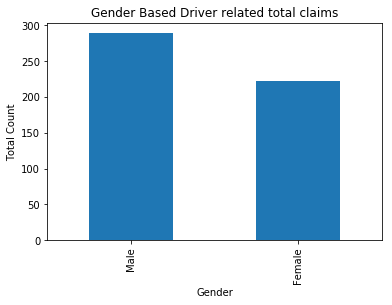

In [21]:
gender_driver_issue = insurance_data.copy()
gender_driver_issue = gender_driver_issue.loc[(gender_driver_issue.incident_cause.str.contains("driver"))|
                                             (gender_driver_issue.incident_cause.str.contains("Driver"))]

gender_driver_issue["gender"].value_counts().plot.bar()
plt.xlabel("Gender")
plt.ylabel("Total Count")
plt.title("Gender Based Driver related total claims")
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart

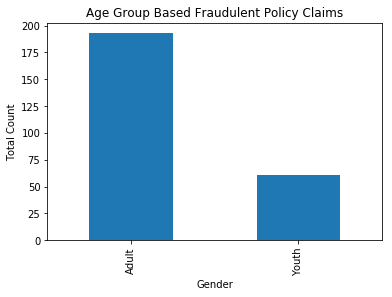

In [22]:
age_group_fraudulent = insurance_data.copy()
age_group_fraudulent = age_group_fraudulent.loc[(age_group_fraudulent.fraudulent == "Yes")]
age_group_fraudulent["age_group"].value_counts().plot.bar()
plt.xlabel("Gender")
plt.ylabel("Total Count")
plt.title("Age Group Based Fraudulent Policy Claims")
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.  

In [34]:
monthly_trend_claim_amount=insurance_data.copy()
monthly_trend_claim_amount["monthly_identifier"]=monthly_trend_claim_amount.claim_date.dt.month.astype(str)+"-"+monthly_trend_claim_amount.claim_date.dt.year.astype(str)
monthly_trend_claim_amount=monthly_trend_claim_amount.groupby(by=["monthly_identifier"])[["claim_amount"]].sum().add_prefix("total_")
monthly_trend_claim_amount["Monthly_Identifier"]=pd.to_datetime(monthly_trend_claim_amount.index,format="%m-%Y")
monthly_trend_claim_amount=monthly_trend_claim_amount.sort_values(by=["Monthly_Identifier"])
monthly_trend_claim_amount.head()

,total_claim_amount,Monthly_Identifier
monthly_identifier,,
1-2017,610217.375362,2017-01-01
2-2017,633467.250242,2017-02-01
3-2017,617167.250242,2017-03-01
4-2017,749356.125121,2017-04-01
5-2017,547592.875362,2017-05-01


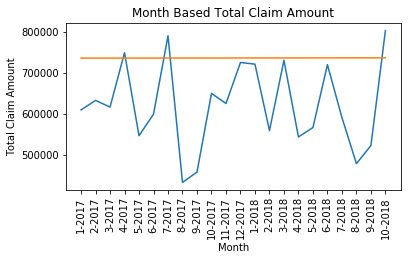

In [37]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(monthly_trend_claim_amount)
plt.xlabel("Month") 
plt.ylabel("Total Claim Amount")
plt.title("Month Based Total Claim Amount")
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims

C:\Users\jiyaj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\jiyaj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


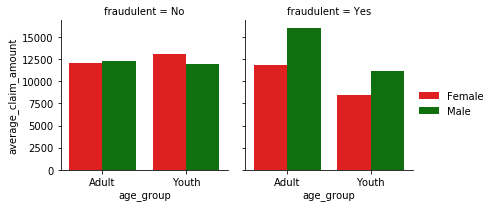

In [38]:
import seaborn as sns
average_claim_amount=insurance_data.copy()
average_claim_amount=average_claim_amount.groupby(by=["gender","age_group","fraudulent"])[["claim_amount"]].mean().add_prefix("average_").reset_index()

graph = sns.FacetGrid(average_claim_amount,col="fraudulent")

graph = graph.map(sns.barplot, "age_group", "average_claim_amount", "gender",
          palette=sns.color_palette(['red','green']))
graph.add_legend()
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

In [39]:
import scipy.stats as stats

### 16. Is there any similarity in the amount claimed by males and females?

In [42]:
amount_claim_male = insurance_data.copy()
amount_claim_male = amount_claim_male.loc[(amount_claim_male["gender"] == "Male"), ["claim_amount"]].reset_index(drop = True)
amount_claim_male.head()

,claim_amount
0,2680.0
1,2240.0
2,38306.5
3,36810.0
4,1730.0


In [44]:
amount_claim_female = insurance_data.copy()
amount_claim_female = amount_claim_female.loc[(amount_claim_female["gender"] == "Female"), ["claim_amount"]].reset_index(drop = True)
amount_claim_female.head()

,claim_amount
0,2980.0
1,2980.0
2,3369.5
3,1950.0
4,1680.0


In [45]:
stats.ttest_ind(amount_claim_male, amount_claim_female, equal_var = True)

Ttest_indResult(statistic=array([0.91052522]), pvalue=array([0.36274543]))

In [46]:
stats.ttest_ind(amount_claim_male, amount_claim_female, equal_var = False)

Ttest_indResult(statistic=array([0.911611]), pvalue=array([0.36217404]))

### 17. Is there any relationship between age category and segment?

In [47]:
crosstable = pd.crosstab(insurance_data.age_group,insurance_data.Segment,margins=True)
crosstable

Segment,Gold,Platinum,Silver,All
age_group,,,,
Adult,302,256,257,815
Youth,88,106,91,285
All,390,362,348,1100


In [49]:
stats.chi2_contingency(observed=crosstable)

(4.42873393294566,
 0.6188639084944283,
 6,
 array([[ 288.95454545,  268.20909091,  257.83636364,  815.        ],
        [ 101.04545455,   93.79090909,   90.16363636,  285.        ],
        [ 390.        ,  362.        ,  348.        , 1100.        ]]))

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

In [50]:
claim_amount_current_year = insurance_data.copy()
fromDate = pd.to_datetime("2017-03-31",format="%Y-%m-%d")
toDate = pd.to_datetime("2018-04-01",format="%Y-%m-%d")
claim_amount_current_year=claim_amount_current_year.loc[((claim_amount_current_year["claim_date"]>fromDate)&(claim_amount_current_year["claim_date"]<toDate)),["claim_amount"]]
claim_amount_current_year.head()

,claim_amount
0,2980.0
2,3369.5
5,1440.0
6,2680.0
8,38306.5


In [51]:
stats.ttest_1samp(a=claim_amount_current_year,popmean=10000)

Ttest_1sampResult(statistic=array([5.26658962]), pvalue=array([1.95679837e-07]))

### 19. Is there any difference between age groups and insurance claims?

In [52]:
claim_amount_children=insurance_data.copy()
claim_amount_children=claim_amount_children.loc[(claim_amount_children["age_group"]=="Children"),["claim_amount"]]

claim_amount_youth=insurance_data.copy()
claim_amount_youth=claim_amount_youth.loc[(claim_amount_youth["age_group"]=="Youth"),["claim_amount"]]

claim_amount_adult=insurance_data.copy()
claim_amount_adult=claim_amount_adult.loc[(claim_amount_adult["age_group"]=="Adult"),["claim_amount"]]

claim_amount_senior=insurance_data.copy()
claim_amount_senior=claim_amount_senior.loc[(claim_amount_senior["age_group"]=="Senior"),["claim_amount"]]

In [53]:
stats.f_oneway(claim_amount_youth,claim_amount_adult)

F_onewayResult(statistic=array([0.54846507]), pvalue=array([0.45910388]))

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [54]:
np.corrcoef(insurance_data.total_policy_claims,insurance_data.claim_amount)[1,0]

-0.01949078142813671